In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from datetime import datetime as dt

import warnings
warnings.filterwarnings('ignore')

font_path = '/System/Library/Fonts/Hiragino Sans GB.ttc' # 系统的中文字体，这是mac实现，如果是Window需要切换目录
myfont = FontProperties(fname=font_path)
print(myfont.get_name())
sns.set(font=myfont.get_name())

Hiragino Sans GB


## 数据导入

In [31]:
# 从csv导入数据
df = pd.read_csv('../input/member-list/stuff.csv')
df.head()

,name,job,birth_date,entry_date,last_promotion_date
0,平刚,处长,1983-01-08,2009-11-17,2014-05-06
1,费伟,处长,1984-03-16,2005-12-08,2017-12-02
2,殷峰,处长,1990-10-27,2016-07-19,2021-01-19
3,葛健,副处长,1955-09-28,2013-01-19,2020-08-29
4,冯强,二级科员,1979-06-29,2018-03-05,2020-07-02


## 数据处理

In [37]:
# 数据处理，将日期列转换为 datetime 类型
df['birth_date']=pd.to_datetime(df['birth_date'])
df['entry_date']=pd.to_datetime(df['entry_date'])
df['last_promotion_date']=pd.to_datetime(df['last_promotion_date'])

# 添加退休时间, 出生日期加上60年
df['retired_date'] = df['birth_date'] + pd.Timedelta('60Y').floor('D')

df['age'] = (dt.now() - df['birth_date']).astype('<m8[Y]')
df.head()

/Users/hawkins/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version.
  exec(code_obj, self.user_global_ns, self.user_ns)


,name,job,birth_date,entry_date,last_promotion_date,age,retired_date
0,平刚,处长,1983-01-08,2009-11-17,2014-05-06,40.0,2043-01-07
1,费伟,处长,1984-03-16,2005-12-08,2017-12-02,39.0,2044-03-15
2,殷峰,处长,1990-10-27,2016-07-19,2021-01-19,32.0,2050-10-26
3,葛健,副处长,1955-09-28,2013-01-19,2020-08-29,67.0,2015-09-27
4,冯强,二级科员,1979-06-29,2018-03-05,2020-07-02,43.0,2039-06-28


## 累计退休人数和当年退休人数
为了计算累计退休人数和当年退休人数，我们需要知道退休年龄规定。假设退休年龄为 60 岁，可以计算员工的当前年龄，然后找出达到退休年龄的员工。

In [33]:
# 筛选已退休员工
retired_employees = df[df['age']>=60]

# 计算累计退休人数
total_retired = len(retired_employees)

# 计算当年退休人数
current_year_retirees = retired_employees[dt.now().year - retired_employees['birth_date'].dt.year == 60]

print(f'累计退休人数：{total_retired}')
print(f'当年退休人数：{len(current_year_retirees)}')

累计退休人数：91
当年退休人数：3


## 某年某月本单位各职级人员年龄分布情况
可以使用 Seaborn 的 boxplot 或 violinplot 函数来展示各职级人员年龄分布情况。

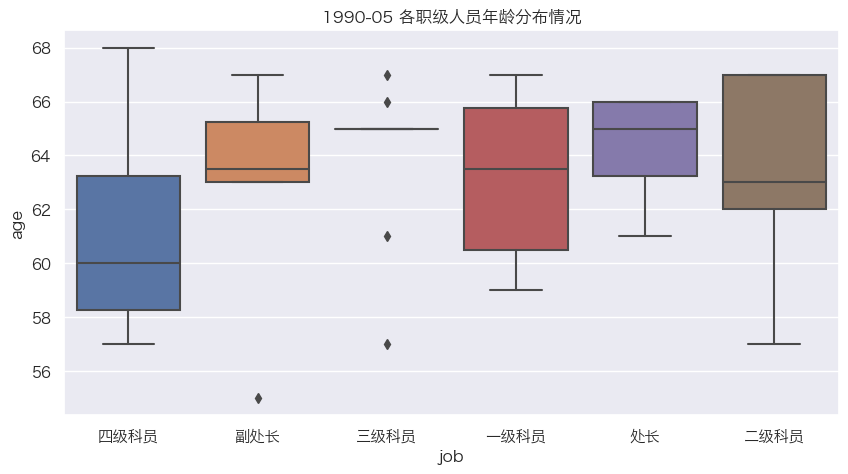

In [66]:
# 选择某年某月的数据
year_month = '1990-05'
# 在选择的时间，只要人员已经进入部门，且当时没有退休就包含
selected_year_month = df[(df['entry_date'].dt.to_period('M') <= pd.to_datetime(year_month).to_period('M')) & (df['retired_date'] > pd.to_datetime(year_month))]
selected_year_month['year_month_age'] = pd.to_datetime(year_month).floor('D') - df['birth_date']
selected_year_month.head(500)

# 绘制箱形图
plt.figure(figsize=(10, 5))
sns.boxplot(data=selected_year_month, x='job', y='age')
plt.title(f'{year_month} 各职级人员年龄分布情况')
plt.show()

## 满足晋升上一级别人员情况
先计算距离上次晋升的时间，然后找出时间大于2年的员工

In [67]:
# 计算距离上次晋升的时间（单位：年）
df['years_since_last_promotion'] = (dt.now() - df['last_promotion_date']).astype('<m8[Y]')

# 筛选满足晋升条件的员工
eligible_for_promotion = df[df['years_since_last_promotion'] > 2]

print('满足晋升上一级别人员情况:')
print(eligible_for_promotion[['name', 'job', 'years_since_last_promotion']])

满足晋升上一级别人员情况:
    name   job  years_since_last_promotion
0     平刚    处长                         9.0
1     费伟    处长                         5.0
5     戚刚  三级科员                         8.0
8     项勇    处长                        11.0
10    梁军  四级科员                        15.0
..   ...   ...                         ...
491   皮军  四级科员                        14.0
495   周俊  一级科员                         4.0
497   姜俊  二级科员                         7.0
498   何强  三级科员                         9.0
499   任强  一级科员                         3.0

[288 rows x 3 columns]
